# Is there difficulty variation between degrees at LSE?


#### Table of Contents


1.	Introduction

* 1.1	Motivation
* 1.2	Objectives and Research Questions
* 1.3	Originality
* 1.4	Brief Overview of Project Process

2.	Data Acquisition and Preparation
* 2.1	(Programmes Data Scraping NP). Collection and matching of degree titles with corresponding characteristics
* 2.2	(Module Data Scraping NP). Individual course and department grade distribution summary
* 2.3	(Modules Extra Info MS). Quality of life characteristics 

3.	Degree Data Preparation and Analysis
* 3.1.	Degree Data Exploration and Wrangling
* 3.2.	Degree Data Analysis and Visualisation

4.	Module Data Preparation
* 4.1.	Why did we choose these degrees
* 4.2.	The general method employed
* 4.3.	Discovering the Designs
   * 4.31) Finance
   * 4.32) Economics
   * 4.33) International Relations
   * 4.34) Politics and Economics
   * 4.35) Physchological and Behavioural Sciences

5. Module-wide Analysis

  
6. Summary and Conclusion
* 6.1.	Summary of findings
* 6.2.	Conclusions based on findings
* 6.3.	Potential analysis limitations
* 6.4.	References


### 1. Introduction

#### Motivation

As undergraduate students who have recently undergone the UCAS application process, we aim to verify whether studying a specific degree offers a higher chance of achieving higher grades and, subsequently, a higher graduate salary compared to studying another degree. Finally, we are examining the discrepancy of grade distribution within each degree, varying for different combinations of optional modules.

#### Overview of Project Process


This introductory-level study will include creating a data frame, which allows for possible module combinations that a student can take within a degree. This will be restricted to the recommended modules, under which we will then work out grade distributions by module. Module selection will be based on specific criteria of interest that are thoroughly explained through the analysis. 

Following the module selection, we will conduct a hypothesis test, by accounting for the standard error within each module, to see if it is statistically possible to artificially 
increase your chances of receiving higher degree marks, and if this leads to accessing the increased rewards of higher graduation grades.

Finally, we will examine on a quantitative and/or qualitative note different statistics that could play a part in each module and degree grade attainment. 


#### Originality

Looking at LSE’s freedom of information page as well as any other publicly available data, there is no similar database or study that has been done, looking at the possible commutations accounting for standard errors to produce a statistical test on this data. This is the primary aspect which we consider to be original.

#### Research Questions

Is it possible to ‘game the system’ in terms of degree choice and module choice to unlock greater graduation outcomes?

Does the grade attainment difference between the “hard” and “easy” degree designs depend on optionality, application acceptance rate, and/or graduation salary?


### 2. Data Acquisition

Link to other notebook (main summarised tables shown here)

### 3.Degree Data Preparation and Analysis


### 3.1 Degree Data Exploration and Wrangling 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os

**3.1.1 Data Loading and Inspection**

We load in the CSV files with the data for programmes/degrees and individual modules and inspect the programme datafraframe.

In [72]:
programms_df = pd.read_csv('data//degrees/programme_data_NDC.csv')
modules_df  = pd.read_csv('data//modules/modul_key_facts_updated.csv')

In [74]:
programms_df.head(1)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary
0,BA Anthropology and Law,AAB,NaN,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20,13:1,"£9,535","£34,500"


**3.1.2 Dealing with missing values**

We inspect what values of the dataframe are missing replace them with 'None' in the case of a_level_extra values and drop the rows with no median salary recorded (we only drop according to median salary and not according to intake or nr_applications because we want to keep as much data as possible and null values are automaticaly not shown in the graphs whereas keeping null median salary values would affect out salary tables ). We identified 17 rows containing missing values, and hence have created a clean dataset using the following code.


In [78]:
programms_df.isnull().sum()

degree              0
a_lvl_req           0
a_lvl_extra        17
modules_y1          0
modules_y2          0
modules_y3          0
nr_applications     2
intake              2
ratio               2
home_fee            1
median_salary       3
dtype: int64

In [80]:
programms_df_clean = programms_df
programms_df_clean['a_lvl_extra'] = programms_df_clean['a_lvl_extra'].fillna('None')
print(f"Missing values in 'a_lvl_extra' after replacement: {programms_df_clean['a_lvl_extra'].isnull().sum()}")

Missing values in 'a_lvl_extra' after replacement: 0


In [82]:
programms_df_clean.dropna(subset=['median_salary'], inplace=True)

**3.1.3 Converting into numeric form and creating the acceptance percentage column**

We clean the intake and nr_applications columns so they’re true numeric columns and we can do calcultions and then create a new column with the acceptance rate in decimal form rather than in ratio form.

In [86]:
programms_df_clean['intake'] = programms_df_clean['intake']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)
programms_df_clean['nr_applications'] = programms_df_clean['nr_applications']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)

programms_df_clean['intake'] = pd.to_numeric(programms_df_clean['intake'], errors='coerce')
programms_df_clean['nr_applications'] = pd.to_numeric(programms_df_clean['nr_applications'], errors='coerce')
programms_df_clean['acceptance_perc'] = (programms_df_clean['intake']/programms_df_clean['nr_applications']).round(5)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535","£34,500",0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38.0,10:1,"£9,535","£35,000",0.10080
2,BA History,AAA,None,"['HY120', 'LSE100']",[],['HY300'],503.0,58.0,9:1,"£9,535","£35,000",0.11531


**3.1.4 Further converting to numeric form and tidying up the dataset**

We convert the median salaries into numeric form and drop the columns we don't need anymore.

In [90]:
programms_df_clean['median_salary'] = programms_df_clean['median_salary'].str.replace(',', '').str.replace('£', '').astype(float)

In [92]:
columns_to_drop = ['nr_applications', 'intake', 'ratio', 'home_fee']
programms_df_clean.drop(columns=columns_to_drop, inplace=True)

**3.1.5 Second dataframe inspection and converting string cells into list cells**

Now we clean the three module columns by defining a fuction that converts each string into a list and apply it to the module columns.

In [96]:
def parse_list_string(s):
    if isinstance(s, str):
        if pd.isna(s) or s.strip() == '[]': 
            return []
        return [item.strip().strip("'\"") for item in s.strip('[]').split(',')]
    return [] 
for col in ["modules_y1", "modules_y2", "modules_y3"]:
    programms_df_clean[col] = programms_df_clean[col].apply(parse_list_string)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531


**3.1.6 Calculating the optionality of the degrees**

We now find the optionality (how many optimal modules there are) of each degree in terms of module units. We do that by defining a function that takes each compulsory module from the lists of each module column (the module columns only state the compulsory modules per year for each degree) and maps it to its corresponding unit value of either 0.5 or 1.0. After doing that we create 3 new columns which show how many units of compulsory modules each degree has for each year. We finally calculate the optionality by subtracting the total compulsory units per degree/programme, from the 12.5 units worth of modules that all undergrad degrees have at LSE. 

In [113]:
module_units_dict = (modules_df.set_index("code")["units"].to_dict())
def sum_units(cell, lookup):
 
    if isinstance(cell, list):
        return sum(lookup.get(m, 0) for m in cell)
    return 0

for year_col, total_col in [("modules_y1", "y1_total_units"), ("modules_y2", "y2_total_units"), ("modules_y3", "y3_total_units"),]:
    programms_df_clean[total_col] = programms_df_clean[year_col].apply(lambda cell: sum_units(cell, module_units_dict))

programms_df_clean['total_compulsory_units'] = ( programms_df_clean['y1_total_units'] + programms_df_clean['y2_total_units'] + programms_df_clean['y3_total_units'])
programms_df_clean['total_optional_units'] = 12.5 - programms_df_clean['total_compulsory_units']
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc,y1_total_units,y2_total_units,y3_total_units,total_compulsory_units,total_optional_units
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000,4.5,3.0,1.0,8.5,4.0
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080,3.5,1.5,1.0,6.0,6.5
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531,1.5,0.0,1.0,2.5,10.0


### 3.2 Degree Data Analysis and Visualisation

**3.2.1 Ranking courses based on optionality**

In [104]:
top5_optional = (programms_df_clean[['degree', 'total_optional_units']].nlargest(5, 'total_optional_units').reset_index(drop=True))
bot5_optional = (programms_df_clean[['degree', 'total_optional_units']].nsmallest(5, 'total_optional_units').reset_index(drop=True))
pd.concat([top5_optional, bot5_optional], axis=1, keys=['Top 5 Optional Units', 'Bottom 5 Optional Units'])

Top 5 Optional Units                       \
                                    degree total_optional_units   
0  BSc International Relations and History                 11.0   
1                               BA History                 10.0   
2                 BSc History and Politics                 10.0   
3              BSc International Relations                 10.0   
4                             BSc Politics                 10.0   

                     Bottom 5 Optional Units                       
                                      degree total_optional_units  
0                                BSc Finance                  2.0  
1   BSc Financial Mathematics and Statistics                  2.0  
2  BSc Psychological and Behavioural Science                  3.5  
3                    BA Anthropology and Law                  4.0  
4         BSc Economic History and Geography                  4.0

**3.2.2 Basic visualisation of salary distribution throughout degrees**

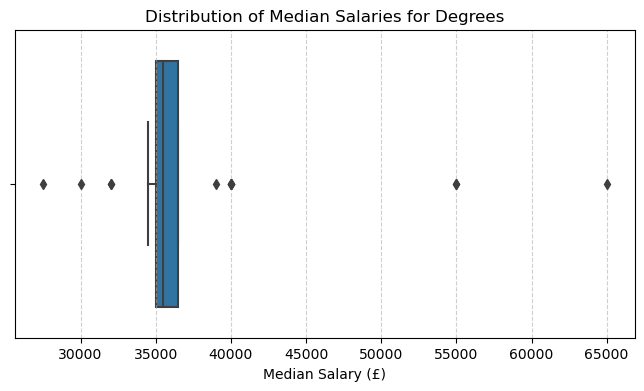

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=programms_df_clean['median_salary'])
plt.title('Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()

The box plot above clearly depicts that the median 50% of programme graduation salaries are in the range of £35,000-£37,000. Finally, all programmes, apart from 3 outliers, lie within the range of £30,000 to £40,000, meaning that typically there is no great discrepancy.

**3.2.3 Highest/lowest median salary degrees**

Now we look at specificaly which degrees have the highest and lowest median salaries.

In [124]:
top5 = programms_df_clean.nlargest(5, 'median_salary')[['degree', 'median_salary']]\
           .reset_index(drop=True)
bottom5 = programms_df_clean.nsmallest(5, 'median_salary')[['degree', 'median_salary']]\
              .reset_index(drop=True)

top5.columns = ['Top 5 Degrees', 'Top Salaries (£)']
bottom5.columns = ['Bottom 5 Degrees', 'Bottom Salaries (£)']

pd.concat([top5, bottom5], axis=1)

,Top 5 Degrees,Top Salaries (£),Bottom 5 Degrees,Bottom Salaries (£)
0,BSc Finance,65000.0,BSc International Relations,27500.0
1,BSc Econometrics and Mathematical Economics,55000.0,BSc Sociology,30000.0
2,BSc Economics,55000.0,BSc International Social and Public Policy,32000.0
3,BSc Financial Mathematics and Statistics,40000.0,BSc International Social and Public Policy wit...,32000.0
4,BSc Mathematics and Economics,40000.0,BA Anthropology and Law,34500.0


**3.2.4 Is there a relationship between A level requirements and median salaries?**

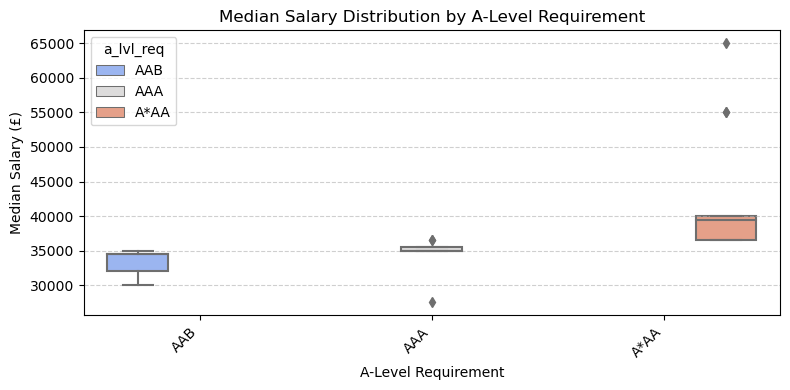

In [15]:
requirement_order = sorted(programms_df_clean['a_lvl_req'].unique(), reverse=True) 
plt.figure(figsize=(8,4))
sns.boxplot(data=programms_df_clean, x='a_lvl_req', y='median_salary', order=requirement_order, palette='coolwarm', hue='a_lvl_req')

plt.title('Median Salary Distribution by A-Level Requirement')
plt.xlabel('A-Level Requirement')
plt.ylabel('Median Salary (£)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This is one of the most informative graphs in our survey. Median salary seems to be heavily reliant on the A-level requirement of each degree. More specifically, each category of A-level requirement seems to be separated in margins. “AAB” ranges from £30,000 to £35,000; “AAA” ranges from £35,000 to £36,000; and “A*AA” ranges from £37,000 to £40,000. These observations refer to the median 50% of each category.




**3.2.5 What about the relationship between acceptance rates and median salaries?**

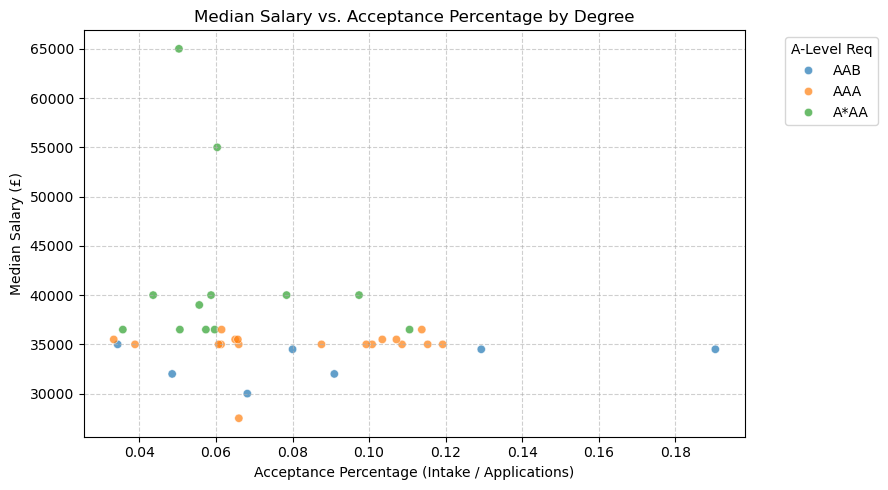

Correlation between Acceptance Percentage and Median Salary: -0.19


In [128]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=programms_df_clean, x='acceptance_perc', y='median_salary', hue='a_lvl_req', alpha=0.7)

plt.title('Median Salary vs. Acceptance Percentage by Degree')
plt.xlabel('Acceptance Percentage (Intake / Applications)')
plt.ylabel('Median Salary (£)')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(title='A-Level Req', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = programms_df_clean['acceptance_perc'].corr(programms_df_clean['median_salary'])
print(f"Correlation between Acceptance Percentage and Median Salary: {correlation:.2f}")

 It can be seen that there is basically no significant trend between acceptance rates and median salaries and that A*AA degrees are above all other degrees with lower grade requirements.

## 4. Module Data Preperation


* 4.1. _Preparing Module Data Tables_
* 4.2.	_Why did we choose these degrees_
* 4.3.	_The general method employed_
* 4.4.	_Discovering the Designs_
   * 4.41. Finance
   * 4.42. Economics
   * 4.43. International Relations
   * 4.44. Politics and Economics
   * 4.45. Physchological and Behavioural Sciences
* 4.5 _Putting it All Together_

###  4.1 Preparing Module Table and Outside Option Table

*We prepare tables we need for preparing the degree designs, and also begin preparing tables giving us a sense of mark distribution

**4.1.1 Creating Merged Tables** 
* We begin by grouping up the different course code to isolate the data for the summary statistics for each course code. We took the arithmetic mean across the different years for each course code. Finally we duplicated this table and merged with the outside option list we scraped from before to create a table of outside options and their respective scores.

In [17]:
marks_df = pd.read_csv('data/modules/marks_summary_modules.csv')


marks_df = marks_df[marks_df['code'].isin(marks_df[marks_df['year'] == '2023/24']['code'].unique())]
# We only looked at courses which existed in 23.24


summary_df = marks_df.groupby('code').apply(
    lambda group: pd.Series({
        'mean': np.average(group['mean'], weights=group['marks']) if group['marks'].sum() > 0 else np.nan,
        'q10': group['q10'].mean() if group['marks'].sum() > 0 else np.nan,
        'Median': group['median'].mean() if group['marks'].sum() > 0 else np.nan,
        'q90': group['q90'].mean() if group['marks'].sum() > 0 else np.nan,
        'Pooled_SD': (
            np.sqrt(((group['marks'] - 1) * group['sd'] ** 2).sum() / (group['marks'].sum() - len(group)))
            if group['marks'].sum() - len(group) > 0 else np.nan
        ),
        'Department': group['department'].mode()[0] if not group['department'].mode().empty else np.nan
    })
).reset_index()


module_facts_df = pd.read_csv("data/modules/modul_key_facts_updated.csv")
summary_df = summary_df.merge(module_facts_df[['code', 'units']], on='code', how='left')


outside_options = pd.read_csv('data/modules/outside_options.csv')


outside_options_marks = outside_options.merge(summary_df,left_on='code',right_on='code',how='left')



outside_options_marks.drop(columns=['course', 'total_students', 'avg_class_size', 'capped'], inplace=True)

outside_options_marks.sort_values(by='mean', ascending=False, inplace=True)
outside_options_marks[["code",'units_x','department','mean','q10','Median','q90','Pooled_SD','prerequisites','mutually_exclusive_courses']].head()


,code,units_x,department,mean,q10,Median,q90,Pooled_SD,prerequisites,mutually_exclusive_courses
67,EC336,0.5,Economics,81.200000,71.500,82.500,89.500,8.300000,"['ST102', 'MA100', 'ST109']",[]
69,EC338,0.5,Economics,75.300000,51.200,80.000,91.000,18.600000,"['EC201', 'EC202']",[]
231,LN200,1.0,Language Centre,74.455556,72.525,74.625,75.925,2.844996,['LN100'],[]
252,MA209,0.5,Mathematics,74.407551,55.860,75.100,91.980,14.521311,"['MA203', 'MA212', 'MA103', 'MA102', 'MA100']",[]
38,DS105A,0.5,Data Science Institute,73.800000,62.800,76.000,84.000,9.700000,[],['DS105W']


**4.1.2 Calculating the Mean of The Compulsory Modules**

* We began by defining a very crucial function, which works out the arithmetic mean of all the summary statistics for each of the course codes in any specified list of modules. We then apply this to the list of compulsory modules to test if it works as intended

In [18]:
def calculate_statistics_for_modules(module_list, summary_df):
    
    selected_modules = summary_df[summary_df['code'].isin(module_list)].copy()

    
    if selected_modules.empty:
        return None, None, None, None, None

    
    if 'units' not in selected_modules.columns:
        raise ValueError("summary_df must include a 'units' column to calculate weighted averages.")

    
    weights = selected_modules['units']
    total_weight = weights.sum()

    mean_value = (selected_modules['mean'] * weights).sum() / total_weight
    q10_value = (selected_modules['q10'] * weights).sum() / total_weight
    median_value = (selected_modules['Median'] * weights).sum() / total_weight
    q90_value = (selected_modules['q90'] * weights).sum() / total_weight
    pooled_sd_value = (selected_modules['Pooled_SD'] * weights).sum() / total_weight

    return mean_value, q10_value, median_value, q90_value, pooled_sd_value

programms_df_clean['modules'] = programms_df_clean['modules_y1'] +programms_df_clean['modules_y2']
+programms_df_clean['modules_y3']

programms_df_clean[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = programms_df_clean['modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    ))

programms_df_clean = programms_df_clean.sort_values(by='Mean', ascending=False)
programms_df_clean[["degree","Mean","Median","Q10","Q90","Pooled_SD"]].head()

,degree,Mean,Median,Q10,Q90,Pooled_SD
38,BSc Psychological and Behavioural Science,66.849313,67.423077,60.559231,73.838077,7.911210
4,BSc Accounting and Finance,66.155615,66.850000,52.270000,79.310000,11.139688
22,BSc International Social and Public Policy,66.147790,66.800000,58.933333,73.440000,7.734817
32,BSc Philosophy Logic and Scientific Method,66.040740,67.995000,56.292000,75.436000,11.273243
9,BSc Economic History and Geography,65.753844,67.300000,57.370000,75.340000,9.786138


**4.1.3 First Year Outside Options** 
* We now filter outside options down to only include 1st year courses in a dataframe we call first year outside options. This is because certain courses have their 1st years choose from a list of 1st year outside options

In [19]:
outside_options_1st_year = outside_options_marks.copy()
outside_options_1st_year['course year'] = outside_options_1st_year['code'].str[2].astype(float)
outside_options_1st_year = outside_options_1st_year[outside_options_1st_year['course year'] == 1.0]
outside_options_1st_year = outside_options_1st_year.dropna(subset=['mean'])
outside_options_1st_year[["code",'units_x','department','mean','q10','Median','q90','Pooled_SD','prerequisites','mutually_exclusive_courses']].head()

,code,units_x,department,mean,q10,Median,q90,Pooled_SD,prerequisites,mutually_exclusive_courses
38,DS105A,0.5,Data Science Institute,73.800000,62.80,76.000000,84.000000,9.700000,[],['DS105W']
0,AC102,0.5,Accounting,71.771288,52.62,74.800000,87.580000,14.904358,[],[]
39,DS105W,0.5,Data Science Institute,70.400000,59.00,73.000000,78.000000,8.000000,[],['DS104A']
347,ST115,0.5,Statistics,70.102410,55.10,70.833333,85.766667,13.730301,"['ST102', 'ST107', 'ST109']",[]
326,SP112,1.0,Social Policy,69.999363,64.08,70.700000,75.640000,5.477388,[],[]


**4.1.4 Module Score Distribution by Department**
* We create a table which groups up modules by department, taking an average of the means and providing a standard deviation figure for the courses in the department. We do this to really understand the distribution of scores between modules in order to spot any trends that may be useful down the line in preparing each degree design. 

In [20]:
department_dist = summary_df.groupby('Department').agg(
    Department_Mean=('mean', 'mean'),
    Department_SD=('mean', 'std')
).reset_index()
department_dist_sorted = department_dist.sort_values(by='Department_SD', ascending=False).reset_index(drop=True)
department_dist_sorted.head()

,Department,Department_Mean,Department_SD
0,Mathematics,63.908494,6.080527
1,Economics,64.044502,5.602156
2,Accounting,64.813868,4.423465
3,Statistics,65.932935,3.984667
4,Management,64.843353,3.071243


### 4.2 Why did we choose these degrees

**4.2.1**   
   * Upon inspection of the different course pages, we quickly discovered how different the pages and courses were from each other. Making one master code which could analyse every single degree to produce a comprenhesive analysis would prove very difficult and prone to error. We hence limited our analysis to 5 degrees, all with certain charateristics which we believe make them interesting degrees to study. By limiting the number of degrees we could really ensure accuracy and that the choices of module that a student can make is very realistic. 
   * Due to every course being different from each other, we try defining functions which are as flexible as possible. This proved to work well. Whenever this broke down however we varied the code to handle these differences for each degree

**4.2.2 The Degrees**

* _Finance_  - Only 2 units of Optionality (Least at LSE)
* _Economics_ - High Graduation Salary, Very Low Acceptance and one of LSE's most Prestigous Courses
* _International Relations_ - 11 Units of Optionality, and lowest Graduation Salary
* _Politics and Economics_ - Most units chosen from the outside options list, and a double award degree
* _Physchological and Behavioural Science_ - highest average amongst it's compulsory modules




### 4.3 General Method Employed

 * Whilst we have scraped all the compulsory courses for each degree possible, we discovered that in some cases there were errors in the list due to the scraping logic not being sophistaced enough to handle the very large differences in course pages. The optional courses were another issue entirely and so we manually created csv files for the degrees we chose to analyse, with the number of units, if its optional/compulsory and the year the module can be taken

* We then prepare each possible combination of module that the student can take and seperate the student into a 'path' based on their 1st year optional module choice.We then use different types of logic, aided by a manual check of the data to ensure compatability to ensure all the optional modules comply with that degree design  of the hardest, easiest and middle values for the mean of means.

* We then add to this one big table with all the degrees to use for further analysis 



### 4.4 Preparing the Degree Designs

### 4.41 Finance

We begin with Finance (our degree), where we look and define most of the functions we will use for the rest of the degrees. 

**4.41.1: Hypothesis**
* As Finance has very little optionality, we hypothesise that the difference between an easy and a hard modules would be limited

**4.41.2: Loading in the Finance Module Options**

In [21]:
finance_options = pd.read_csv("data/degrees/financem.csv")
finance_options.head(5)

,Module,Year,Optional/Compulsory,Prerequisites,Units
0,MA108,1.0,0,0.0,0.5
1,FM100,1.0,0,0.0,0.5
2,FM102,1.0,0,0.0,0.5
3,EC1A3,1.0,0,0.0,0.5
4,EC1B3,1.0,0,0.0,0.5


**4.41.2 Preparing a table with just compulsory modules** 
* We now define a function which looks at all the compulsory modules a student can take ,and create a dataframe which makes a list of modules, the number of units taken and how many more units the student needs to take in first year (that isn't an outside option), marked OO in the Finance Options dataframe

In [22]:
def summarize_compulsory_modules(df, standard_units_per_year=4):
    df['Units'] = pd.to_numeric(df['Units'])
    df['Year'] = pd.to_numeric(df['Year'])
    
    comp = df[df['Optional/Compulsory'] == 0]
    oo = df[df['Module'].str.upper().str.contains('OO')]

    y1_comp = comp[comp['Year'] == 1]['Units'].sum()
    y1_oo = oo[oo['Year'] == 1]['Units'].sum()
    y1_non_oo_needed = standard_units_per_year - y1_comp - y1_oo

    return pd.DataFrame([{
        'Compulsory Modules': comp['Module'].tolist(),
        'Total Compulsory Units': comp['Units'].sum(),
        'Year 1 Non-OO Units Needed': y1_non_oo_needed
    }])

initial_combinations_dffi = summarize_compulsory_modules(finance_options)
initial_combinations_dffi

,Compulsory Modules,Total Compulsory Units,Year 1 Non-OO Units Needed
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0.5


**4.41.3 Creating 'Paths' for each of the 1st-year optionals** 
* We define a function, which looks for all of the optional modules that aren't an outside option in 1st year to then create the list of modules which are compulsory and then the 1st year optional module the student chose. We decided to segment it like this, because 1st year choices are made before a student properly joins LSE and hence they wouldn't take course difficulty into account as much as their interest in learning that module


In [23]:
from itertools import combinations

def generate_year1_optional_combinations(base_summary_df, all_modules_df, standard_units_per_year=4):
    needed = base_summary_df.iloc[0]['Year 1 Non-OO Units Needed']
    comp_modules = base_summary_df.iloc[0]['Compulsory Modules']
    comp_units = base_summary_df.iloc[0]['Total Compulsory Units']

    modules = all_modules_df[
        (all_modules_df['Optional/Compulsory'] == 1) & 
        (all_modules_df['Year'] == 1) & 
        (~all_modules_df['Module'].str.upper().str.contains('OO'))
    ][['Module', 'Units']].dropna().values.tolist()
    
    if not modules:
        return base_summary_df
    
    rows = []
    for r in range(1, len(modules) + 1):
        for combo in combinations(modules, r):
            if sum(u for _, u in combo) == needed:
                opts = [m for m, _ in combo]
                rows.append({
                    'Modules': comp_modules + opts,
                    'Optional Modules Added': opts,
                    'Total Units': comp_units + needed
                })

    return pd.DataFrame(rows)

year1_combos_dffi = generate_year1_optional_combinations(initial_combinations_dffi, finance_options)
year1_combos_dffi2 =year1_combos_dffi
year1_combos_dffi2 

,Modules,Optional Modules Added,Total Units
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5


**4.41.4 Creating subrows** 
* This function just manipulates the dataframe, so that each optional module choice has a difficulty subrow as is shown below

In [24]:
def create_difficulty_subrows(year1_combos_dfirf):
    subrows = []
    
    for _, row in year1_combos_dfirf.iterrows():
        for difficulty in ['Hard', 'Medium', 'Easy']:
            subrow = row.copy()
            subrow['Difficulty'] = difficulty
            subrows.append(subrow)
    
    year1_combos_dfirf_expanded = pd.DataFrame(subrows)
    
    return year1_combos_dfirf_expanded
year_1_combos_dffi3 = create_difficulty_subrows(year1_combos_dffi2)
year_1_combos_dffi4=year_1_combos_dffi3.copy()
year_1_combos_dffi4

,Modules,Optional Modules Added,Total Units,Difficulty
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Hard
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Medium
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Easy
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Hard
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Medium
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Easy


**4.41.5 Determining the Outside Options the Student Takes**

* We define a function which searches a dataframe list of modules, and attempts to calculate the combination of modules with highest, middle and lowest mean values for a specified number of units. We will then manually check to see if that combination actually works against prerequisites

In [25]:
def find_mean_of_means_combinationsOO(df, target_units=4.0, code_col='code', mean_col='mean', unit_col='units_x'):
    valid_combos = [
        (", ".join(getattr(c, code_col) for c in combo), np.mean([getattr(c, mean_col) for c in combo]))
        for r in range(1, len(df) + 1)
        for combo in itertools.combinations(df.itertuples(index=False), r)
        if np.isclose(sum(getattr(c, unit_col) for c in combo), target_units)
    ]

    sorted_combos = sorted(valid_combos, key=lambda x: x[1])
    mid_index = len(sorted_combos) // 2

    
    print("Lowest Mean of Means Combo:", sorted_combos[0])
    print("Median Mean of Means Combo:", sorted_combos[mid_index])
    print(" Highest Mean of Means Combo:", sorted_combos[-1])


#find_mean_of_means_combinationsOO(outside_options_marks, target_units=1.5)

**4.41.6 Big Issue** 
* The code above produces a combinations of outside options up to 1.5 units but this took our computers took over an hour to run the code. This was because the number of combinations was in the billions. We realized that the process for finding outside options was going to have to go down a different front for outside options. We can only use this on lists of optional courses where the number of courses is much smaller
* The original plan would be to look at the prerequisites list for each of the outside options the student can take, and then from there work out if that outside option is available to be taken based on the students prior modules. However the section listing prerequisites is incredibly different for every single module and it was impossible for us to come up with a way to extract all information effectively. We settled for adding it as a prerequsite if the course code is mentioned in the prerequisite subheading. However a lot of the prerequisites are mixed with Ands, Or's, or 2 of the 4, and it was very tricky for us to integrate this accurately. So we settled for simply analysing the list of outside options based on mean and choosing modules which are definitely valid and a realistic choice. This was time consuming and removed the automation of our code but we believe we preserved accuracy and hence this was a trade-off we wanted to make.  Furthermore, some outside options have other outside options as prerequisites and the code would then have to be dynamic which would significantly increase the length of code needed. So we defined a function which sorts the means of the outside options mark dataframe and displays a custom number of hard, easy and median mean value modules

In [26]:
def print_sorted_by_mean(dataframe, num=5):
    df = dataframe.dropna(subset=['mean']).sort_values(by='mean')
    print('Hardest'); display(df.iloc[:num][['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units_x']])
    print('Median'); display(df.iloc[len(df)//2 - num//2 : len(df)//2 + num//2 + (num%2)][['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units_x']])
    print('Easiest'); display(df.iloc[-num:][['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units_x']])


print_sorted_by_mean(outside_options_marks,num=5)

Hardest


,code,mean,prerequisites,mutually_exclusive_courses,units_x
258,MA222,48.790000,['MA100'],[],0.5
246,MA102,50.002740,"['MA108', 'MA100', 'MA107']",['MA103'],0.5
45,EC1B3,51.712965,[],['EC1B5'],0.5
52,EC2C4,53.003552,"['ST102', 'MA107', 'ST107', 'MA100']",['MG205'],0.5
247,MA103,53.980561,"['MA108', 'MA100', 'MA160P']",['MA102'],1.0


Median


,code,mean,prerequisites,mutually_exclusive_courses,units_x
203,LL272,65.661818,[],[],0.5
34,AN393,65.700000,"['AN101', 'AN100', 'AN200']",[],0.5
143,HY206,65.722128,[],[],1.0
24,AN276,65.730435,[],[],0.5
201,LL251,65.765789,[],[],1.0


Easiest


,code,mean,prerequisites,mutually_exclusive_courses,units_x
38,DS105A,73.800000,[],['DS105W'],0.5
252,MA209,74.407551,"['MA203', 'MA212', 'MA103', 'MA102', 'MA100']",[],0.5
231,LN200,74.455556,['LN100'],[],1.0
69,EC338,75.300000,"['EC201', 'EC202']",[],0.5
67,EC336,81.200000,"['ST102', 'MA100', 'ST109']",[],0.5


**4.41.7 Outside Option Selection**

* Upon inspection of the dataframes above, we determined the hardest, easiest and middle outcomes of 1.5 units worth of outside options. We then manually checked this to ensure they were completely valid and then defined a function which would aim to add the dataframe to the one we have already produced above
* We look at the median outcome as well throughout the analysis of degrees to understand what someone who wouldn't pay attention to module difficulty would pick on average. This was done as sanity check of our data to udnerstand the distribution within each degree

In [27]:
def expand_with_difficulty_variants(year1_combos_df, difficulty_df):
    rows = []

    for _, combo in year1_combos_df.iterrows():
        for _, diff in difficulty_df.iterrows():
            if (combo['Difficulty'] == diff['Difficulty'] and 
                combo['Optional Modules Added'] == diff['Optional Modules Added']):
                rows.append({
                    'Modules': combo['Modules'] + diff['OO_added'],
                    'Optional Modules Added': combo['Optional Modules Added'] + diff['OO_added'],
                    'Difficulty': combo['Difficulty'],
                    **{k: combo[k] for k in combo.index if k not in ['Modules', 'Optional Modules Added', 'Difficulty']}
                })

    return pd.DataFrame(rows)

Based on the list of outside options and the students intitial choices, these are the valid outside options the student would take

In [28]:
difficulty_dffi = pd.DataFrame([
    {'Difficulty': 'Hard','Optional Modules Added': ['AC102'],'OO_added': ['MA102', 'AC332', 'EC339']},
    {'Difficulty': 'Medium', 'Optional Modules Added': ['AC102'], 'OO_added': [ 'AC342', 'LL251']}, 
    {'Difficulty': 'Easy',   'Optional Modules Added': ['AC102'], 'OO_added': ['DS105A', 'EH209']},
    {'Difficulty': 'Hard', 'Optional Modules Added': ['ST101'],'OO_added':[ 'MA102', 'LL106']  }, 
    {'Difficulty': 'Medium',  'Optional Modules Added': ['ST101'],  'OO_added': ['AN237', 'LL251'] },
    {'Difficulty': 'Easy', 'Optional Modules Added': ['ST101'], 'OO_added': ['DS105A', 'ST310', 'ST311'] }
])

finance_combos = expand_with_difficulty_variants(year_1_combos_dffi4, difficulty_dffi)
finance_combos


,Modules,Optional Modules Added,Difficulty,Total Units
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[AC102, MA102, AC332, EC339]",Hard,10.5
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[AC102, AC342, LL251]",Medium,10.5
2,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[AC102, DS105A, EH209]",Easy,10.5
3,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[ST101, MA102, LL106]",Hard,10.5
4,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[ST101, AN237, LL251]",Medium,10.5
5,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...","[ST101, DS105A, ST310, ST311]",Easy,10.5


**4.41.8 Calculating Statistics for the Modules Chosen**



In [29]:
finance_combos[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = finance_combos['Modules'].apply(
    lambda x: pd.Series(calculate_statistics_for_modules(x, summary_df))
)
finance_combos["degree"] = "BSc Finance"
finance_combos[["Modules","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]


,Modules,Difficulty,Mean,Median,Q10,Q90,Pooled_SD,degree
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Hard,62.801920,64.028030,47.036894,78.390379,13.409812,BSc Finance
1,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Medium,64.025480,65.062121,49.620303,78.314697,12.186466,BSc Finance
2,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Easy,64.854011,65.846212,50.169848,79.218788,12.526142,BSc Finance
3,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Hard,62.659597,63.715530,47.388030,77.501515,13.051809,BSc Finance
4,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Medium,63.841241,64.807576,49.377576,78.036742,12.394622,BSc Finance
5,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",Easy,64.856697,65.919697,50.004167,79.427652,12.831765,BSc Finance


**4.41.9 The Finance Table**

* We ended up with this table which lists the modules, and the means based on the difficulty the student can choose. If any of the modules do not have any data points, then as they are treated as NaN modules the mean calculation skips them over. 

There are a few interesting obsevrations that can be made here:

* The easiest possible combination for Finance is very similar to the recommended modules that the department suggests to their students.
* It does not appear that there is much of a difference between hard and easy degree designs. We suspect this is because there is very little choice a student can make and hence even if there is a big difference in easy and hard modules it takes up a small % of the overall degree
* We conduct further analysis in the analysis section

Finally, our hypothesis appears to be correct

### 4.42 Economics

**4.42.1 Hypothesis** 
We now analyse Economics, using a lot of the logic we defined above, and a few new functions which fit into the course structure that Economics has. Economics has a high graduation salary, a median amount of optionality and a low acceptance rate. Our hypothesis is that is quite unclear what the difference between easy and hard will be

In [30]:
econ_options = pd.read_csv("data/degrees/econm.csv")

In [31]:
initial_combinations_df3 = summarize_compulsory_modules(econ_options)

In [32]:
year1_combos_df = generate_year1_optional_combinations(initial_combinations_df3, econ_options)

In [33]:
year_1_combos_df2 = create_difficulty_subrows(year1_combos_df)
year_1_combos_df3=year_1_combos_df2.copy()

**4.42.2**
* Economics has an outside options choice in its 1st year. This list is difference to the other outside options list so we pick a module from there for the different designs of the degree.We used the print sorted mean to discover the 1st year outside options.

In [34]:
#print_sorted_by_mean(outside_options_1st_year,num=5)basing

In [35]:
difficulty_df = pd.DataFrame([
    {'Difficulty': 'Hard','Optional Modules Added': ['MA100'],'OO_added': ['MA102',"ST101A"]}, 
    {'Difficulty': 'Medium', 'Optional Modules Added': ['MA100'], 'OO_added': ['PH103']}, 
    {'Difficulty': 'Easy', 'Optional Modules Added': ['MA100'],'OO_added': ['DS105A', 'AC102'] }, 
    {'Difficulty': 'Hard', 'Optional Modules Added': ['MA108', 'EC1B1'],'OO_added': ['MA102',"ST101A"] },
    {'Difficulty': 'Medium',  'Optional Modules Added': ['MA108', 'EC1B1'],'OO_added': ['PH103'] },
    {'Difficulty': 'Easy', 'Optional Modules Added': ['MA108', 'EC1B1'], 'OO_added': ['DS105A', 'AC102'] }
])

In [36]:
year_1incOO_df = expand_with_difficulty_variants(year_1_combos_df3, difficulty_df)

**4.42.2 Completing Optional Course Info**
* we now create code which adds to the options in the course options dataframe, including a lot of the information around means. We then create a table which only looks at the 3rd Year optional courses in Economics (that aren't OO) or courses that dont have any data

In [37]:
def add_summary_and_prereqs(econ_options, summary_df, outside_options_marks):
    merged_df = pd.merge(econ_options, summary_df, left_on='Module', right_on='code', how='left')
    merged_with_outside = pd.merge(merged_df, outside_options_marks[['code', 'prerequisites', 'mutually_exclusive_courses']],
                                   left_on='Module', right_on='code', how='left')

    if 'code' in merged_with_outside.columns:
        merged_with_outside = merged_with_outside.drop(columns=['code'])
    
    return merged_with_outside

merged_df_e = add_summary_and_prereqs(econ_options, summary_df,outside_options_marks)

merged_df_e3= merged_df_e[merged_df_e['Year'] == 3]
merged_df_e3 = merged_df_e3.sort_values(by='mean', ascending=False)
merged_df_e3 = merged_df_e3.dropna(subset=['mean'])
merged_df_e3 = merged_df_e3[~merged_df_e3['Module'].isin(['FM322', 'FM321'])]
merged_df_e3.head()

,Module,Year,Optional/Compulsory,Units,code_x,mean,q10,Median,q90,Pooled_SD,Department,units,code_y,prerequisites,mutually_exclusive_courses
26,EC336,3,1,0.5,EC336,81.200000,71.50,82.5,89.50,8.300000,Economics,0.5,EC336,"['ST102', 'MA100', 'ST109']",[]
28,EC338,3,1,0.5,EC338,75.300000,51.20,80.0,91.00,18.600000,Economics,0.5,EC338,"['EC201', 'EC202']",[]
24,EC334,3,1,0.5,EC334,70.300000,59.80,69.0,80.20,8.200000,Economics,0.5,EC334,"['FM201', 'MA107', 'EC221', 'EC220', 'MA100', ...",[]
13,EC307,3,1,1.0,EC307,69.420201,61.58,70.4,78.60,7.888646,Economics,1.0,EC307,"['ST109', 'MA107', 'EC221', 'ST102', 'EC220', ...",[]
36,PH311,3,1,1.0,PH311,69.136341,61.96,69.4,74.68,7.903559,Method,1.0,PH311,[],[]


In [38]:
def find_mean_of_means_combinations(df, target_units=4.0, code_col='Module', mean_col='mean', unit_col='Units'):
    valid_combos = [
        (", ".join(getattr(c, code_col) for c in combo), np.mean([getattr(c, mean_col) for c in combo]))
        for r in range(1, len(df) + 1)
        for combo in itertools.combinations(df.itertuples(index=False), r)
        if np.isclose(sum(getattr(c, unit_col) for c in combo), target_units)
    ]

    sorted_combos = sorted(valid_combos, key=lambda x: x[1])
    mid_index = len(sorted_combos) // 2

    
    print("Lowest Mean of Means Combo:", sorted_combos[0])
    print("Median Mean of Means Combo:", sorted_combos[mid_index])
    print(" Highest Mean of Means Combo:", sorted_combos[-1])


**4.42.3 Optional Courses Combinations**

In [39]:
find_mean_of_means_combinations(merged_df_e3, target_units=4.0)

Lowest Mean of Means Combo: ('EC302, EC310, EC337, EC319, EC335', 61.36188861669116)
Median Mean of Means Combo: ('EC338, EC313, EC321, EC311, EC339', 66.7704531590414)
 Highest Mean of Means Combo: ('EC336, EC338, EC307, PH311, EC330', 72.61130832099067)


In [40]:
difficulty_df2 = pd.DataFrame([
    {'Difficulty': 'Hard','Optional Modules Added': ['MA100','MA102',"ST101A"],'OO_added': ['EC302', 'EC310','EC337','EC319','EC335','MA212']}, 
    {'Difficulty': 'Medium', 'Optional Modules Added': ['MA100','PH103'], 'OO_added': ['PH103']}, 
    {'Difficulty': 'Easy', 'Optional Modules Added': ['MA100','DS105A', 'AC102'],'OO_added': ['DS105A', 'AC102'] }, 
    {'Difficulty': 'Hard', 'Optional Modules Added': ['MA108', 'EC1B1','MA102',"ST101A"],'OO_added': ['MA102',"ST101A"] },
    {'Difficulty': 'Medium',  'Optional Modules Added': ['MA108', 'EC1B1','PH103'],'OO_added': ['PH103'] },
    {'Difficulty': 'Easy', 'Optional Modules Added': ['MA108', 'EC1B1','AC102'], 'OO_added': ['DS105A', 'AC102'] }
])

## Finish this off and then apply it
year_1incOO_df2 = year_1incOO_df.copy()
for difficulty, additions in append_dict.items():
    mask = year_1incOO_df2['Difficulty'] == difficulty
    
    year_1incOO_df2.loc[mask, 'Modules'] = year_1incOO_df2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year_1incOO_df2.loc[mask, 'Optional Modules Added'] = year_1incOO_df2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
### try change this one

NameError: name 'append_dict' is not defined

In [ ]:
year_1incOO_df2[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year_1incOO_df2['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year_1incOO_df2["degree"] = "BSc Economics"
year_1incOO_df2[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]


**4.42.4 Final Table** 
* On quick inspection there is a much wider difference between easy and hard module here. Potentially because there is a lot more choice. Our hypothesis doesn't really hold here. We suspect this is because there is a lot of hard and easy economics modules. 

### 4.43 International Relations

**4.43.1 Hypothesis**
* International Relations is a degree with a lot of choice, and no outside options and hence we thought it is an interesting degree to analyse. We predict a large range here

In [ ]:
ir_options = pd.read_csv("data/degrees/irm.csv")


In [ ]:
initial_combinations_dfir = summarize_compulsory_modules(ir_options)


In [ ]:
year1_combos_dfir = generate_year1_optional_combinations(initial_combinations_dfir, ir_options)
                                                              
                                                                                                                                                         

**4.43.2** 
* We manualy remove all the mutually exclusive combinations of 1st year options in IR

In [ ]:
year1_combos_dfirf = year1_combos_dfir[year1_combos_dfir['Optional Modules Added'].isin([[ 'HY113', 'HY116' ], [ 'HY113', 'EH101' ],
[ 'HY113', 'GV101' ],[ 'HY113', 'PH103' ],[ 'HY113', 'SO100' ],[ 'HY116', 'EH101' ],[ 'HY116', 'GV101' ],[ 'HY113', 'PH103' ],
['HY113', 'SO10O' ]])]
   

In [ ]:
merged_df_ir = add_summary_and_prereqs(ir_options, summary_df,outside_options_marks)

merged_df_ir3= merged_df_ir[merged_df_ir['Year'] == 3]
merged_df_ir3 = merged_df_ir3.sort_values(by='mean', ascending=False)
merged_df_ir3 = merged_df_ir3.dropna(subset=['mean'])
merged_df_ir3 = merged_df_ir3.dropna(subset=['mean'])
merged_df_ir3 = merged_df_ir3[~merged_df_ir3['Module'].isin(['LL342'])]

merged_df_ir2= merged_df_ir[merged_df_ir['Year'] == 2]
merged_df_ir2 = merged_df_ir2.sort_values(by='mean', ascending=False)
merged_df_ir2 = merged_df_ir2.dropna(subset=['mean'])

result_ir2 = find_mean_of_means_combinations(merged_df_ir2, target_units=4.0)
result_ir3 = find_mean_of_means_combinations(merged_df_ir3, target_units=3.0)


In [ ]:
append_dict_ir3 = {
    'Hard': ['IR315','IR380','IR317','IR379','IR368'],
    'Medium': ['IR373','IR395','IR398','IR317','IR379'],
    'Easy': ['IR377' ,'IR373','IR391','IR323','IR398']
}

append_dict_ir2 = {
    'Hard': ['IR206','IR203','IR205','IR202'],
    'Medium': ['IR200','IR206','IR205','IR202'],
    'Easy': ['IR200','IR206','IR203','IR205']
}

year1_combos_dfirf2 = year1_combos_dfirf .copy()

year1_combos_dfirf2 = create_difficulty_subrows(year1_combos_dfirf2)

for difficulty, additions in append_dict_ir2.items():
    mask = year1_combos_dfirf2['Difficulty'] == difficulty
    
    year1_combos_dfirf2.loc[mask, 'Modules'] = year1_combos_dfirf2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year1_combos_dfirf2.loc[mask, 'Optional Modules Added'] = year1_combos_dfirf2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
for difficulty, additions in append_dict_ir3.items():
    mask = year1_combos_dfirf2['Difficulty'] == difficulty
    
    year1_combos_dfirf2.loc[mask, 'Modules'] = year1_combos_dfirf2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year1_combos_dfirf2.loc[mask, 'Optional Modules Added'] = year1_combos_dfirf2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )

### sort this one

In [ ]:
year1_combos_dfirf2[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfirf2['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfirf2["degree"] = "BSc International Relations"
year1_combos_dfirf2[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]].head()

**4.43.3 Final Table**
* Loads of options, but not much of a difference! We suspect this is because even though there is a lot of choice in terms of the absolute number, the degree is choosing from fixed lists which are not much longer than the number of units required

### Politics and Economics

**4.44.1 Hypothesis**
* Particularly after what we found above, we looked for the degree which has the most outside options (there were a lot of ties), so we chose Politics and Economics because it is a dual degree and hence theoretically has access to quite a few different option types. We hypothesise a wide range

In [ ]:
pe_options = pd.read_csv("data/degrees/pem.csv")


In [ ]:
initial_combinations_dfpe = summarize_compulsory_modules(pe_options)
initial_combinations_dfpe

In [ ]:
year1_combos_dfpe = generate_year1_optional_combinations(initial_combinations_dfpe, pe_options)
year1_combos_dfpe2 = create_difficulty_subrows(year1_combos_dfpe)
year1_combos_dfpe2

In [ ]:
merged_df_pe = add_summary_and_prereqs(pe_options, summary_df,outside_options_marks)


In [ ]:
merged_df_pe2= merged_df_pe[merged_df_pe['Year'] == 2]
merged_df_pe2 = merged_df_pe2.sort_values(by='mean', ascending=False)
merged_df_pe2 = merged_df_pe2.dropna(subset=['mean'])
merged_df_pe2 = merged_df_pe2[merged_df_pe2['Optional/Compulsory'] == 1.0]



merged_df_pe3GV =merged_df_pe[merged_df_pe['Year'] == 3]
merged_df_pe3GV = merged_df_pe3GV[merged_df_pe3GV['Optional/Compulsory'] == 1.0]
merged_df_pe3GV = merged_df_pe3GV.sort_values(by='mean', ascending=False)
merged_df_pe3GV = merged_df_pe3GV.dropna(subset=['mean'])
merged_df_pe3GV = merged_df_pe3GV[merged_df_pe3GV['Module'].str.startswith('GV')]



merged_df_pe3EC =merged_df_pe[merged_df_pe['Year'] == 3]
merged_df_pe3EC = merged_df_pe3EC[merged_df_pe3EC['Optional/Compulsory'] == 1.0]
merged_df_pe3EC = merged_df_pe3EC.sort_values(by='mean', ascending=False)
merged_df_pe3EC = merged_df_pe3EC.dropna(subset=['mean'])
merged_df_pe3EC = merged_df_pe3EC[merged_df_pe3EC['Module'].str.startswith('EC')]


In [ ]:
result_pe2 = find_mean_of_means_combinations(merged_df_pe2, target_units=2.0)
result_pe3g = find_mean_of_means_combinations(merged_df_pe3GV, target_units= 1.0)
result_pe3e = find_mean_of_means_combinations(merged_df_pe3EC, target_units=1.0)

In [ ]:
append_dict_pe2 = {
    'Hard': ['GV248','GV262','GV325','GV313','EC339','EC335','LL106','MA102','ST101A'],
    'Medium': ['GV263','GV251','GV328','GV316','EC334','EC339','LL221','LL205'],
    'Easy': ['GV249','GV245','GV314','EC338','EC334','DS105A','AC102','EH209']
}
year1_combos_dfpe3 =year1_combos_dfpe2.copy()
year1_combos_dfpe3['Modules'] = year1_combos_dfpe3.apply(
    lambda row: list(set(row['Compulsory Modules'] + append_dict_pe2.get(row['Difficulty'], []))),
    axis=1
)

year1_combos_dfpe3['Optional Modules Added'] = year1_combos_dfpe3['Difficulty'].apply(
    lambda diff: append_dict_pe2.get(diff, [])
)

In [ ]:
year1_combos_dfpe3[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfpe3['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfpe3["degree"] = "BSc Politics and Economics"
year1_combos_dfpe3[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

**4.44.2 Final Table**
* There does seem to be a little bit more of a range between module choices here, but once again nothing that is realistically too significant. Our hypothesis was wrong here


### 4.45 Psychological and Behavioural Sciences


**4.45.1 Hypothesis** 
* We predict that as PBS is a course which is easy, and has compulsory modules which average out to the highest mean, then potentially the difference between high and low is enough to take the score above 70

In [ ]:
pb_options = pd.read_csv("data/degrees/pbsm.csv")
pb_options.head()

In [ ]:
initial_combinations_dfpb = summarize_compulsory_modules(pb_options)

In [ ]:
year1_combos_dfpb = generate_year1_optional_combinations(initial_combinations_dfpb, pb_options)

In [ ]:
year1_combos_dfpb2= create_difficulty_subrows(year1_combos_dfpb) 

In [ ]:
merged_df_pb = add_summary_and_prereqs(pb_options, summary_df,outside_options_marks)
merged_df_pb2= merged_df_pb[merged_df_pb['Year'] == 3]
merged_df_pb2 = merged_df_pb2.sort_values(by='mean', ascending=False)
merged_df_pb2 = merged_df_pb2.dropna(subset=['mean'])
merged_df_pb2 = merged_df_pb2[merged_df_pb2['Optional/Compulsory'] == 1.0]
result_pb2 = find_mean_of_means_combinations(merged_df_pb2, target_units=0.5)


In [ ]:
append_dict_pb3 = {
    'Hard': ['AC103','EC1B3','EC1A3','PB307'],
    'Medium': ['LL210','AN237','PB314'],
    'Easy': ['DS105A','EH215','AC102','PB312']
}

year1_combos_dfpb3 =year1_combos_dfpb2.copy()
year1_combos_dfpb3['Modules'] = year1_combos_dfpb3.apply(
    lambda row: list(set(row['Modules'] + append_dict_pb3.get(row['Difficulty'], []))),
    axis=1
)


year1_combos_dfpb3['Optional Modules Added'] = year1_combos_dfpb3['Difficulty'].apply(
    lambda diff: append_dict_pb3.get(diff, [])
)


In [ ]:
year1_combos_dfpb3[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfpb3['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfpb3["degree"] = "BSc Psychological and Behavioural Science"
year1_combos_dfpb3[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]].head()

**4.45.2 Final Table** 
* Our hypothesis was wrong here, PBS is also a relatively uninteresting course

### 4.5  Putting it All Together

We add all the tables together, and then select only the hardest and easiest possible combination a student can choose for each degree. 

In [ ]:
Final_Comparison = pd.concat([year1_combos_dfpb3,year1_combos_dfpe3,year1_combos_dfirf2,year_1incOO_df2,finance_combos], ignore_index=True)


In [ ]:
Final_Comparison = Final_Comparison.loc[[0, 5, 18, 20, 42, 50,54,59,63,65]] 
Final_Comparison[["Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

## 5) Module Analysis

**5.1**
* We first want to visualise the discrepancy for hard and easy degree desigsns for the degrees we have chosen to analyse. We put this in reference to thresholds of 70, and 65.5 which are respectively the score required for a first and the overall degree average needed to get a first if you have obtained 8 or more firsts overall

In [ ]:
degrees =Final_Comparison["degree"].unique()
easy_means = Final_Comparison[Final_Comparison["Difficulty"] == 'Easy']["Mean"].values
hard_means =  Final_Comparison[Final_Comparison["Difficulty"] == 'Hard']["Mean"].values
fig, ax = plt.subplots(figsize=(10, 6))
for i, degree in enumerate(degrees):
    ax.plot([i, i], [hard_means[i], easy_means[i]], color='black')  # Line between hard and easy
    ax.scatter(i, easy_means[i], color='green', label='Easy' if i==0 else "", s=100)
    ax.scatter(i, hard_means[i], color='red', label='Hard' if i==0 else "", s=100)
ax.axhline(65.5, color='blue', linestyle='--', label='65.5 Threshold')
ax.axhline(70.0, color='purple', linestyle='--', label='70.0 Threshold')
ax.set_xticks(range(len(degrees)))
ax.set_xticklabels(degrees, rotation=45, ha='right')
ax.set_ylabel('Mean Score')
ax.set_title('Easy vs Hard Mean Scores by Degree')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

**5.2**
* We can see here, that for every course except Finance, allows a student to surpass the 65.5 threshold which is a substantial advantage to the student. But no course takes a student above the 70% threshold. There is quite a difference in the ranges between the courses, so we will conduct further analysis to understand what creates these differences.  

* Interestingly, looking at the t-values for each of the course designs, we can see tha conducting a hypothesis test comparing the means between the easy and hard design produces a t value which is below 1, for every single course. There are no degrees of freedom that produce values that low whilst still having a low signifcance level. This indicates that the difference can be purely based on statistical differences of the consitutuent modules and hence there is no likely difference. I.e a student can't really 'cheat the system'.

In [ ]:
programms_df_clean['total_optional_units'] 

In [ ]:
easy_means = Final_Comparison[Final_Comparison['Difficulty'] == 'Easy'].groupby('degree')['Mean'].mean().reset_index()
easy_means.rename(columns={'Mean': 'Easy_Mean'}, inplace=True)

hard_means = Final_Comparison[Final_Comparison['Difficulty'] == 'Hard'].groupby('degree')['Mean'].mean().reset_index()
hard_means.rename(columns={'Mean': 'Hard_Mean'}, inplace=True)

range_df = pd.merge(easy_means, hard_means, on='degree')

range_df['Range'] = range_df['Easy_Mean'] - range_df['Hard_Mean']

range_df['Primary Department'] = ['Economics', 'Finance', 'Relations', 'Government', 'Science']
range_df
optional_units = programms_df_clean[["degree","total_optional_units",'median_salary','acceptance_perc']]
variance_table = range_df.copy()
var_df = pd.merge(variance_table, department_dist, left_on='Primary Department', right_on='Department', how='left')
opt_df = pd.merge(var_df, optional_units, left_on='degree', right_on='degree', how='left')
opt_df



In [ ]:
sns.set(style='whitegrid', context='notebook')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()
sns.scatterplot(data=opt_df, x='Department_SD', y='Range', ax=axes[0], color='teal', s=100, edgecolor='black')
x = opt_df['Department_SD']
y = opt_df['Range']
coeffs = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = coeffs[0] * x_line + coeffs[1]
axes[0].plot(x_line, y_line, linestyle='--', color='black')

axes[0].set_title('Range vs Department SD', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Department SD', fontsize=12)
axes[0].set_ylabel('Range', fontsize=12)
axes[0].set_ylim(0, 7)
axes[0].tick_params(width=2)
for spine in axes[0].spines.values():
    spine.set_linewidth(1.5)

sns.scatterplot(data=opt_df,x='total_optional_units',y='Range',ax=axes[1],color='darkorange',s=100, edgecolor='black')

x = opt_df['total_optional_units']
y = opt_df['Range']
coeffs = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = coeffs[0] * x_line + coeffs[1]
axes[1].plot(x_line, y_line, linestyle='--', color='black')

axes[1].set_title('Range vs Total Optional Units', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Optional Units', fontsize=12)
axes[1].set_ylabel('Range', fontsize=12)
axes[1].set_ylim(0, 7)
axes[1].tick_params(width=2)
for spine in axes[1].spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

**5.3**
* The first plot analyses how range could be affected by department sd, this is a metric which looks at the difference between the hard and easy modules within the primary department of the course. We looked at this for the reason that because this is a driver between the hard and easy course designs. Certain courses like economics have a lot of variance, and as expected they have a large range. But the overall pattern is unclear. There is an upwards trend but there are lot of courses concentrated around a specific Department SD which makes the trend less obvious. One issue of this is that some courses have options in different department modules, e.g finance which has no option in Finance. 

* The second plot analyses how the range is impacted by the number of optional unis within a degree. This pattern is even more clouded with the regression predicting no pattern. We suspect this is because even though a course may have a large degree of optionality, there are lot of other factors which come into play in explaining the range. One such example may be the number of options the student gets to choose from, (IR has a lot of units of optionality, but overall not many more options to choose from). In a more ideal setting there is a more comprenshive metric of optionality, but the presence of outside options skews the analysis quite significantly.

In [ ]:
baseline_dif= compulsory_mods_lse_df[['degree','Mean']]
diff_df = pd.merge(opt_df.copy(), baseline_dif, left_on='degree', right_on='degree', how='left')
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', context='notebook')

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

x_vars = ['median_salary', 'acceptance_perc', 'Mean']
titles = ['Easy Mean vs Median Salary', 'Easy Mean vs Acceptance %', 'Easy Mean vs Mean of Compulsory Modules']
colors = ['royalblue', 'seagreen', 'darkred']

for i, x_var in enumerate(x_vars):
    ax = axes[i]
    
    sns.scatterplot(data=diff_df,x=x_var,y='Easy_Mean',ax=ax,color=colors[i],s=100,edgecolor='black')
    x = diff_df[x_var]
    y = diff_df['Easy_Mean']
    coeffs = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = coeffs[0] * x_line + coeffs[1]
    ax.plot(x_line, y_line, linestyle='--', color='black')
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel(x_var.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Easy_Mean', fontsize=12)
    ax.tick_params(width=2)
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

**5.4**

* Range between hard and easy is something that is impacted by some other factors, but we also want to analyse how difficult a course is, based on certain factors and how this correlates with outcomes. I.e can you pick an easy degree and unlock good enough outcomes. 

* The first plot shows that as a course gets harder, the median salary by graduates (after 15 months) gets higher. This is relatively in line with what is expected. With there being so few data points the actual relationship is hard to confirm. As Economics has a relatively easy design and a high grad salary so we will not make an asssertive statement here.
* The second plot shows that acceptance rate has no relationship with how easy a course is. This is possibly because there are so many other factors driving acceptance %, and prospective students do not have an idea of how easy a course is until they get to LSE. The factor we would attribute to this would be 'prestige'. This 'prestige' is a factor in our opinion driven by acceptance rate, grad salary and how difficult a course is. But this is a very hard factor to isolate and measure
* The third plot is a definitive relationship that as the compulsory courses get easier, the highest mean outcome for the easy design increases. This is an expected driver

### Conclusion

#### Summary of Findings

* Based on the analysis we have done above, we do not believe it is possible to 'game' the system and choose easy modules to increase your overall degree score. This is due to statistical variation in the course results, assuming that the student is as good as the average. Even despite the statistical variation, the largest range is only 6% and is only ever enough to push a student above the 1st threshold to obtain a first. Additionally, this range is very dependent on the % of courses in specific departments as some departments have a large range of hard and easy courses. In terms of graduate outcome, it is unclear whether an easy degree really correlates with higher grad salary and the difficulty of joining a course has little to do with how easy a course is. Overall selecting a 'percieved easy degree to get into' does not mean that it is an easy course and hence a degree with higher salary. Overall LSE has a relatively robust degree system that is well designed and fair.  

* Some courses have given recommendations which are actually the easiest possible combination that a student can take, such as BSc Finance. The mean outcome is always in the 2:1 classification, q10 is never a fail and q90 is always a first, regardless of difficulty. The hardest modules at LSE are Maths and Economics. We have also found that the A- Level requirement for a course is actually well correlated with graduate salary. Most degrees have graduate salary between a thin band apart from a few outliers. 

#### Limitiations

As discussed, there are quite a lot of limitations in our analaysis. A lot of these have mentioned beforehand but we will run through a quick summary of the limitations and how they impacted the analysis

* **Only Choosing 5 Degrees** - This was done due to the difficulty of completing an accurate and comprehensive study of the degrees at LSE. We have chose different specific charateristics here which would be a reason for having a large difference between hard and easy.
* **Missing Courses** - Some courses have no data as they didnt exist in the last year. Therefore the calcualtion for mean has simply skipped it over
* **Students may have correlated performance** - we have made an assumption in our t testing, that the student is average at every module, but if they are good at some courses they are likely to be good at others which impacts the standard error for each course.

#### What else could be done?

The natural next step would be to analyse the rest of the degrees at LSE, and adapting our code to be able to process course combinations fully automatically, this would involve creating a significantly more intelligent scraping bot. With all of this we can comprenhesively compare different charateristics to make a more informed decision